In [112]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

In [113]:
raw_data = pd.read_csv("epi_r.csv")

In [114]:
raw_data.rating.describe()
#20052 recipes with mean rating of 3.71
#25% percentile is higher than the mean, likely some outliers

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

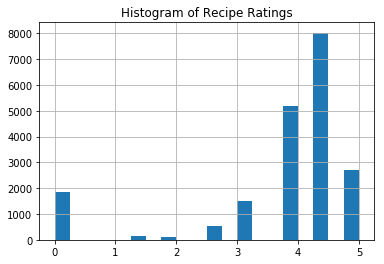

In [115]:
raw_data.rating.hist(bins=20)
plt.title('Histogram of Recipe Ratings')
plt.show()

In [116]:
# Count nulls 
null_count = raw_data.isnull().sum()
null_count[null_count>0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

In [117]:
#Dropping columns that are not ingredients
not_ingredients = ['title']
raw_data = raw_data.drop(not_ingredients, axis=1)

In [118]:
#Set above average rating if Rating is > mean 
raw_data['rating_type'] = np.where(raw_data['rating'] > 3.714, 1, 0)

In [119]:
raw_data.describe()

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey,rating_type
count,20052.000000,1.593500e+04,15890.000000,1.586900e+04,1.593300e+04,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,...,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000
mean,3.714467,6.322958e+03,100.160793,3.468775e+02,6.225975e+03,0.000299,0.000050,0.000848,0.001346,0.000349,...,0.026332,0.000050,0.000299,0.014861,0.000150,0.000349,0.001396,0.000948,0.022741,0.793287
std,1.340829,3.590460e+05,3840.318527,2.045611e+04,3.333182e+05,0.017296,0.007062,0.029105,0.036671,0.018681,...,0.160123,0.007062,0.017296,0.121001,0.012231,0.018681,0.037343,0.030768,0.149080,0.404958
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.750000,1.980000e+02,3.000000,7.000000e+00,8.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,4.375000,3.310000e+02,8.000000,1.700000e+01,2.940000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,4.375000,5.860000e+02,27.000000,3.300000e+01,7.110000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,5.000000,3.011122e+07,236489.000000,1.722763e+06,2.767511e+07,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [120]:
raw_data['calories'].fillna((raw_data['calories'].mean()), inplace=True)
raw_data['protein'].fillna((raw_data['protein'].mean()), inplace=True)
raw_data['fat'].fillna((raw_data['fat'].mean()), inplace=True)
raw_data['sodium'].fillna((raw_data['sodium'].mean()), inplace=True)

In [121]:
#Finding the most common words
raw_data = raw_data.loc[:, (raw_data.sum() >= 1000)]

In [122]:
raw_data.columns.unique()

Index(['rating', 'calories', 'protein', 'fat', 'sodium', 'appetizer', 'bake',
       'bon appétit', 'cheese', 'chicken', 'chill', 'christmas',
       'cocktail party', 'dairy', 'dairy free', 'dessert', 'dinner', 'drink',
       'egg', 'fall', 'fruit', 'garlic', 'ginger', 'gourmet', 'grill/barbecue',
       'healthy', 'herb', 'high fiber', 'kid-friendly', 'kidney friendly',
       'kosher', 'lemon', 'low cal', 'lunch', 'milk/cream', 'no sugar added',
       'no-cook', 'onion', 'peanut free', 'pescatarian', 'potato',
       'quick & easy', 'roast', 'salad', 'sauce', 'sauté', 'side', 'soup/stew',
       'soy free', 'spring', 'sugar conscious', 'summer', 'thanksgiving',
       'tomato', 'tree nut free', 'vegan', 'vegetable', 'vegetarian',
       'wheat/gluten-free', 'winter', 'rating_type'],
      dtype='object')

In [123]:
remove = ['rating']
raw_data = raw_data.drop(remove, axis=1)

In [124]:
X = raw_data.drop('rating_type', 1)
y = raw_data['rating_type'].astype(int)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [  9.98156986e-01   1.81443661e-03   2.82393155e-05   3.38439942e-07
   6.61696673e-12   2.18143433e-12   2.09504966e-12   1.35880074e-12
   1.13740475e-12   9.39891882e-13   7.81141333e-13   7.45852208e-13
   7.00932884e-13   6.87141272e-13   6.19408863e-13   5.86882201e-13
   5.67295342e-13   5.09833565e-13   4.73414994e-13   4.61296598e-13
   4.53363635e-13   4.46350189e-13   4.32457181e-13   4.21094935e-13
   4.11601120e-13   3.96060304e-13   3.74788927e-13   3.71830458e-13
   3.61635205e-13   3.52546116e-13]


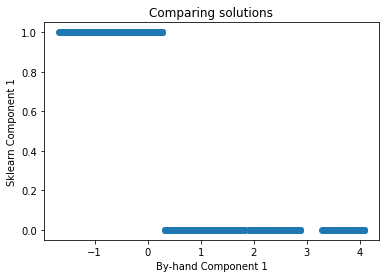

In [125]:
sklearn_pca = PCA(n_components=30)
y_sklearn = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

# Compare the sklearn solution to ours.
plt.plot(Y_sklearn[:, 0], y, 'o')
plt.title('Comparing solutions')
plt.ylabel('Sklearn Component 1')
plt.xlabel('By-hand Component 1')
plt.show()

In [126]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(16041, 59) (16041,)
(4011, 59) (4011,)


In [127]:
#Logistic Regression
from sklearn.model_selection import cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print('Accuracy of logistic regression classifier on test set: {:.5f}'.format(logreg.score(X_test, y_test)))

logregscores = cross_val_score(logreg, X, y, cv=10)
print(logregscores)
print ('\nMean cross validation score is: ' + str(np.mean(logregscores)))


Accuracy of logistic regression classifier on test set: 0.80005
[ 0.79312064  0.79262213  0.79312064  0.79312064  0.79312064  0.79351621
  0.79301746  0.79091816  0.78093812  0.79341317]

Mean cross validation score is: 0.791690781286


In [128]:
#Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import BernoulliNB
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
    
#Testing Naive Bayes Classifier
BNB = BernoulliNB()
BNB.fit(X_train, y_train)
    
y_pred = BNB.predict(X_test)

print('Accuracy of Bernoulli classifier: {:.5f}'.format(BNB.score(X_test, y_test)))

BNB_scores = cross_val_score(BNB, X, y, cv=10)
print(BNB_scores)
print ('\nMean cross validation score is: ' + str(np.mean(BNB_scores)))

Accuracy of Bernoulli classifier: 0.78659
[ 0.77617149  0.77417747  0.78265204  0.77916251  0.7886341   0.78603491
  0.79002494  0.7759481   0.77794411  0.78143713]

Mean cross validation score is: 0.781218679887


In [129]:
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble

param_grid = {'n_estimators': 100,
         'max_depth':3,
         'loss': 'deviance',
         'subsample': 0.8,
         'max_features': 'auto',
         'learning_rate':0.05,
         'min_samples_leaf':3}

clf = ensemble.GradientBoostingClassifier(**param_grid, random_state=0)
clf.fit(X_train, y_train)

print('Accuracy of Gradient Boosting Classifier on Test: {:.5f}'.format(clf.score(X_test, y_test)))

clf_scores = cross_val_score(clf, X, y, cv=10)
print(clf_scores)
print ('\nMean cross validation score is: ' + str(np.mean(clf_scores)))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Accuracy of Gradient Boosting Classifier on Test: 0.80180
[ 0.80109671  0.80109671  0.80309073  0.8000997   0.8000997   0.80598504
  0.80399002  0.7989022   0.80139721  0.80489022]

Mean cross validation score is: 0.802064823245


In [130]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
rfc = ensemble.RandomForestClassifier()
rfc.fit(X_train, y_train)

print('Accuracy of Random Forest Classifier: {:.5f}'.format(rfc.score(X_test, y_test)))

cvScores = cross_val_score(rfc, X, y, cv=10) 
print(cvScores)
print ('\nMean cross validation score is: ' + str(np.mean(cvScores)))


Accuracy of Random Forest Classifier: 0.81227
[ 0.81754736  0.8115653   0.80807577  0.81405783  0.81405783  0.81246883
  0.82094763  0.80688623  0.81137725  0.81936128]

Mean cross validation score is: 0.813634529709
